<a href="https://colab.research.google.com/github/BenegaAriel/Data_Analysis_Practice/blob/main/DOLARES_PRIVADOS_ARG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Depositos en dolares del sector privado en Argentina.**

*Los ahorristas compran dolares por Homebanking y por precaucion prefieren retirarlos y guardarlos "en el colchon".*

#### Import Necessary Libraries

In [1]:
pip install calplot

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import time
from datetime import date, datetime, timedelta
import datetime as dt
import plotly.graph_objects as go
import calplot

#### Load Data

In [3]:
# Current day
today = date.today()
str(today)

'2021-09-09'

In [4]:
# Data from https://www.bcra.gob.ar/PublicacionesEstadisticas/Cuadros_estandarizados_series_estadisticas.asp
# Dinero y crédito (saldos).
# Información diaria sobre Reservas Internacionales, principales pasivos del BCRA y principales activos y pasivos de las entidades financieras.

# Importar informacion de depositos privados en dolares desde la pagina del BCRA.
# Copiar el link donde se aloja el Archivo Excel.
# Los datos tienen dos dias de Diferencia. Ejemplo: 2020-08-21 se van a conocer los datos del 2020-08-19

xls_2021 = pd.ExcelFile('https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/dep2021.xls')

xls_2020 = pd.ExcelFile('https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/dep2020.xls')

xls_2019 = pd.ExcelFile('https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/dep2019.xls')

xls_2018 = pd.ExcelFile('https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/dep2018.xls')

xls_2017 = pd.ExcelFile('https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/dep2017.xls')

xls_2016 = pd.ExcelFile('https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/dep2016.xls')

xls_2015 = pd.ExcelFile('https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/dep2015.xls')

xls_2014 = pd.ExcelFile('https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/dep2014.xls')


# Seleccionar la hoja que se quiere utilizar del archivo. Ejemplo #df = pd.read_excel(xls, 'Sheet2').

data_2021 = pd.read_excel(xls_2021, 'Sector_privado')
data_2020 = pd.read_excel(xls_2020, 'Sector_privado')
data_2019 = pd.read_excel(xls_2019, 'Sector_privado')
data_2018 = pd.read_excel(xls_2018, 'Sector_privado')
data_2017 = pd.read_excel(xls_2017, 'Sector_privado')
data_2016 = pd.read_excel(xls_2016, 'Sector_privado')
data_2015 = pd.read_excel(xls_2015, 'Sector_privado')
data_2014 = pd.read_excel(xls_2014, 'Sector_privado')


In [5]:
for item in range(2014,2022):
  print(f"data_{item}")

data_2014
data_2015
data_2016
data_2017
data_2018
data_2019
data_2020
data_2021


#### Clean Data

In [6]:
# Crear un diccionario con los nombres de la fila 24. Luego se usara para renombrar las columnas.
dict(data_2021.loc[24])
# Renombrar las columnas con los nombres de la linea 24.
data_2021 = data_2021.rename(columns=dict(data_2021.loc[24]))
# Mostrar los ultimos 5 valores.
#data_2020.tail()

# Seleccionar las columnas que nos interesa mostrar.
cols_to_subset = ['dep000','deppri097']
data_2021[cols_to_subset]
df_2021 = data_2021[cols_to_subset]
#df_2020.tail()

# Mostrar datos solo a partir de la fila 25 que es la primer fecha ( 2 de enero 2020 )
df_2021 = df_2021.loc[25:]
df_2021.tail(4)

,dep000,deppri097
188,20210902,16404
189,20210903,16368
190,20210906,16415
191,NaN,NaN


In [7]:
# Crear un diccionario con los nombres de la fila 24. Luego se usara para renombrar las columnas.
dict(data_2020.loc[24])
# Renombrar las columnas con los nombres de la linea 24.
data_2020 = data_2020.rename(columns=dict(data_2020.loc[24]))
# Mostrar los ultimos 5 valores.
#data_2020.tail()

# Seleccionar las columnas que nos interesa mostrar.
cols_to_subset = ['dep000','deppri097']
data_2020[cols_to_subset]
df_2020 = data_2020[cols_to_subset]
#df_2020.tail()

# Mostrar datos solo a partir de la fila 25 que es la primer fecha ( 2 de enero 2020 )
df_2020 = df_2020.loc[25:]
df_2020.head(2)

,dep000,deppri097
25,20200102,19418
26,20200103,19357


In [8]:
# Una funcion que limpie todo de forma mas rapido!

#def clean(file):
#  '''Rename the columns with the names of line 24. 
#  Select the columns that we are interested in showing. 
#  Show data only from row 25 which is the first date (first business day of each year)
#  Arguments:
#      A variable
#  '''
#  file = file.rename(columns=dict(file.loc[24]))
#  cols_to_subset = ['dep000','deppri097']
#  file[cols_to_subset]
#  file = file[cols_to_subset]
#  file = file.loc[25:]
#  return file.head()

In [9]:
# Crear un diccionario con los nombres de la fila 24. Luego lo usara para renombrar las columnas.
dict(data_2019.loc[24])
# Renombrar las columnas con los nombres de la linea 24.
data_2019 = data_2019.rename(columns=dict(data_2019.loc[24]))
# Mostrar los ultimos 5 valores.
#data_2019.tail()

# Seleccionar las columnas que me interesan.
cols_to_subset = ['dep000','deppri097']
data_2019[cols_to_subset]
df_2019 = data_2019[cols_to_subset]
#df_2019.tail()

# Mostrar datos solo a partir de la fila 25 que es la primer fecha ( 2 de enero 2019 )
df_2019 = df_2019.loc[25:]
df_2019.head(2)

,dep000,deppri097
25,20190102,29104
26,20190103,29162


In [10]:
# Crear un diccionario con los nombres de la fila 24. Luego lo usare para renombrar las columnas.
dict(data_2018.loc[24])
# Renombrar las columnas con los nombres de la linea 24
data_2018 = data_2018.rename(columns=dict(data_2018.loc[24]))
# Mostrar los ultimos 5 valores
#data_2018.tail()

# Seleccionar las columnas que me interesan.
cols_to_subset = ['dep000','deppri097']
data_2018[cols_to_subset]
df_2018 = data_2018[cols_to_subset]
#df_2018.tail()

# Mostrar datos solo a partir de la fila 25 que es la primer fecha ( 2 de enero 2018 )
df_2018 = df_2018.loc[25:]
df_2018.head(2)

,dep000,deppri097
25,20180102,26643
26,20180103,26562


In [11]:
# Crear un diccionario con los nombres de la fila 24. Luego lo usare para renombrar las columnas.
dict(data_2017.loc[24])
# Renombrar las columnas con los nombres de la linea 24
data_2017 = data_2017.rename(columns=dict(data_2017.loc[24]))
# Mostrar los ultimos 5 valores
#data_2017.tail()

# Seleccionar las columnas que me interesan.
cols_to_subset = ['dep000','deppri097']
data_2017[cols_to_subset]
df_2017 = data_2017[cols_to_subset]
#df_2017.tail()

# Mostrar datos solo a partir de la fila 25 que es la primer fecha ( 2 de enero 2017 )
df_2017 = df_2017.loc[25:]
df_2017.head(2)

,dep000,deppri097
25,20170102,22623
26,20170103,22689


In [12]:
# Crear un diccionario con los nombres de la fila 24. Luego lo usare para renombrar las columnas.
dict(data_2016.loc[24])
# Renombrar las columnas con los nombres de la linea 24
data_2016 = data_2016.rename(columns=dict(data_2016.loc[24]))
# Mostrar los ultimos 5 valores
#data_2016.tail()

# Seleccionar las columnas que me interesan.
cols_to_subset = ['dep000','deppri097']
data_2016[cols_to_subset]
df_2016 = data_2016[cols_to_subset]
#df_2016.tail()

# Mostrar datos solo a partir de la fila 25 que es la primer fecha ( 4 de enero 2016 )
df_2016 = df_2016.loc[25:]
df_2016.head(2)

,dep000,deppri097
25,20160104,10767
26,20160105,10786


In [13]:
# Crear un diccionario con los nombres de la fila 24. Luego lo usare para renombrar las columnas.
dict(data_2015.loc[24])
# Renombrar las columnas con los nombres de la linea 24
data_2015 = data_2015.rename(columns=dict(data_2015.loc[24]))
# Mostrar los ultimos 5 valores
#data_2015.tail()

# Seleccionar las columnas que me interesan.
cols_to_subset = ['dep000','deppri097']
data_2015[cols_to_subset]
df_2015 = data_2015[cols_to_subset]
#df_2015.tail()

# Mostrar datos solo a partir de la fila 25 que es la primer fecha ( 2 de enero 2015 )
df_2015 = df_2015.loc[25:]
df_2015.head(2)

,dep000,deppri097
25,20150102,7503
26,20150105,7518


In [14]:
# Crear un diccionario con los nombres de la fila 24. Luego lo usare para renombrar las columnas.
dict(data_2014.loc[24])
# Renombrar las columnas con los nombres de la linea 24
data_2014 = data_2014.rename(columns=dict(data_2014.loc[24]))
# Mostrar los ultimos 5 valores
#data_2014.tail()

# Seleccionar las columnas que me interesan.
cols_to_subset = ['dep000','deppri097']
data_2014[cols_to_subset]
df_2014 = data_2014[cols_to_subset]
#df_2014.tail()

# Mostrar datos solo a partir de la fila 25 que es la primer fecha ( 2 de enero 2014 )
df_2014 = df_2014.loc[25:]
df_2014.head(2)

,dep000,deppri097
25,20140102,6986
26,20140103,6965


In [15]:
# Merge the 8 years into a single file.

files = [df_2014 , df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]
#files

all_years_data = pd.concat(files)
all_years_data

,dep000,deppri097
25,20140102,6986
26,20140103,6965
27,20140106,6968
28,20140107,6979
29,20140108,6953
...,...,...
187,20210901,16542
188,20210902,16404
189,20210903,16368
190,20210906,16415


In [16]:
# Renombrar las columnas
all_years_data = all_years_data.rename(columns={'dep000': 'DATE', 'deppri097': 'DEPOSITOS PRIVADOS'})
all_years_data.head(3)

,DATE,DEPOSITOS PRIVADOS
25,20140102,6986
26,20140103,6965
27,20140106,6968


In [17]:
# Crear dos nuevas columnas con la diferencia diaria entre los valores de Dolares Privados y la diferencia porcentual.

all_years_data['VARIACION'] = all_years_data['DEPOSITOS PRIVADOS'].diff(1)
all_years_data['VARIACION PCT'] = all_years_data['DEPOSITOS PRIVADOS'].pct_change(1)*100
#all_years_data.info()

In [18]:
# Convertir las columnas 'DEPOSITOS PRIVADOS' y 'VARIACION' de object a float.

all_years_data["DEPOSITOS PRIVADOS"] = pd.to_numeric(all_years_data["DEPOSITOS PRIVADOS"])
all_years_data["VARIACION"] = pd.to_numeric(all_years_data["VARIACION"])

# Convertir la columna 'DATE' de object a datetime
 
all_years_data['DATE'] = pd.to_datetime(all_years_data['DATE'], format='%Y%m%d')
#all_years_data.tail()
#all_years_data.info()

In [19]:
# Set Index
 
all_years_data_ind = all_years_data.set_index('DATE')
#all_years_data_ind.head()
all_years_data_ind.tail()

,DEPOSITOS PRIVADOS,VARIACION,VARIACION PCT
DATE,,,
2021-09-01,16542.0,89.0,0.540935
2021-09-02,16404.0,-138.0,-0.834240
2021-09-03,16368.0,-36.0,-0.219459
2021-09-06,16415.0,47.0,0.287146
NaT,NaN,NaN,0.000000


#### Cuadros y Graficos

In [20]:
# DEPOSITOS PRIVADOS EN DOLARES ULTIMOS OCHO DIAS

all_years_data_ind.tail(10)

,DEPOSITOS PRIVADOS,VARIACION,VARIACION PCT
DATE,,,
2021-08-25,16409.0,-4.0,-0.024371
2021-08-26,16405.0,-4.0,-0.024377
2021-08-27,16367.0,-38.0,-0.231637
2021-08-30,16400.0,33.0,0.201625
2021-08-31,16453.0,53.0,0.323171
2021-09-01,16542.0,89.0,0.540935
2021-09-02,16404.0,-138.0,-0.834240
2021-09-03,16368.0,-36.0,-0.219459
2021-09-06,16415.0,47.0,0.287146


In [21]:
sum = all_years_data_ind['VARIACION'].tail(46)
print('A partir del 15 de Septiembre 2020 los ahorristas retiraron',sum.sum()*-1,'millones de dolares de los Bancos')
print('El promedio diario es de',round(sum.mean()*-1,2),'millones de dolares')

A partir del 15 de Septiembre 2020 los ahorristas retiraron -178.0 millones de dolares de los Bancos
El promedio diario es de -3.96 millones de dolares


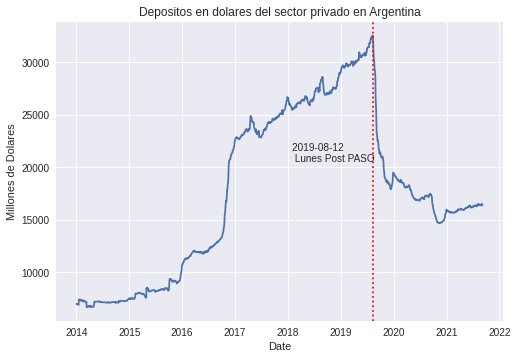

In [22]:
# GRAFICO
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn')
#plt.style.use('bmh')

fig, ax = plt.subplots()

ax.plot(all_years_data['DATE'], all_years_data['DEPOSITOS PRIVADOS'])
ax.set_xlabel('Date')
ax.set_ylabel('Millones de Dolares')
ax.set_title('Depositos en dolares del sector privado en Argentina')

#plt.axvline(dt.datetime(2017, 4, 12),c='g',ls=':')

plt.axvline(dt.datetime(2019, 8, 12),c='red',ls=':')

ax.annotate("2019-08-12 \n Lunes Post PASO",
            xy=(dt.datetime(2018, 2, 1), 20500)) # Esta es la ubicacion en el grafico



#plt.axvline(dt.datetime(2020, 9, 15),c='green',ls=':')

#ax.annotate("2020-09-15 \n Mayores restricciones \n a la compra \n de dolar solidario",
#            xy=(dt.datetime(2019, 6, 1), 7000)) # Esta es la ubicacion en el grafico



plt.show()
#2017-04-17

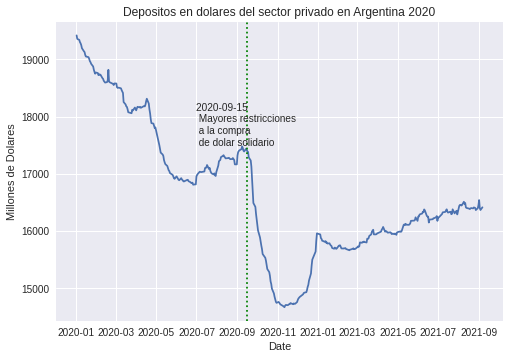

In [23]:
# ZOOM 2020
veinte_veinte = all_years_data[all_years_data['DATE']>'2020-01-01']

# GRAFICO
plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
fig, ax = plt.subplots()

ax.plot(veinte_veinte['DATE'], veinte_veinte['DEPOSITOS PRIVADOS'])
ax.set_xlabel('Date')
ax.set_ylabel('Millones de Dolares')
ax.set_title('Depositos en dolares del sector privado en Argentina 2020')

plt.axvline(dt.datetime(2020, 9, 15),c='green',ls=':')

ax.annotate("2020-09-15 \n Mayores restricciones \n a la compra \n de dolar solidario",
            xy=(dt.datetime(2020, 7, 1), 17500)) # Esta es la ubicacion en el grafico


#plt.axvline(dt.datetime(2019, 8, 12),c='red',ls=':')

#plt.axvline(dt.datetime(2017, 4, 12),c='g',ls=':')

#ax.annotate("2019-08-12 Lunes Post PASO",
#            xy=(dt.datetime(2017, 5, 1), 12000)) # Esta es la ubicacion en el grafico

plt.show()



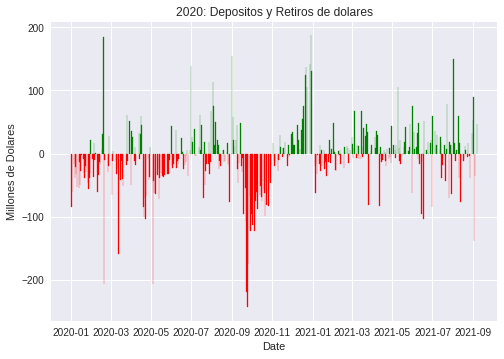

In [24]:
# GRAFICO VARIACION DIARIA
# Grafico de barras con condicional para el color ( verde >= 0, rojo < 0)

#plt.figure(figsize=(20,7))

plt.style.use('seaborn')

fig, ax = plt.subplots()

ax.bar(veinte_veinte['DATE'], veinte_veinte['VARIACION'])
for bar in ax.patches:
    if bar.get_height() >= 0:
        bar.set_color('green')    
    else:
        bar.set_color('red')

ax.set_xlabel('Date')
ax.set_ylabel('Millones de Dolares')
ax.set_title('2020: Depositos y Retiros de dolares')

plt.show()

In [25]:
# brief descriptive coefficients

all_years_data_ind[['DEPOSITOS PRIVADOS']].describe()

,DEPOSITOS PRIVADOS
count,1870.000000
mean,17572.190909
std,7784.071119
min,6670.000000
25%,9279.250000
50%,16890.000000
75%,24645.750000
max,32570.000000


In [26]:
# VALORES MINIMOS, MAXIMOS Y PROMEDIO POR MES.

info_mensual = all_years_data_ind.resample('M',convention='end')['DEPOSITOS PRIVADOS'].agg(['min','max','mean'])
info_mensual.tail(20)

,min,max,mean
DATE,,,
2020-02-29,18551.0,18817.0,18656.277778
2020-03-31,18058.0,18578.0,18308.684211
2020-04-30,17799.0,18312.0,18081.450000
2020-05-31,16913.0,17604.0,17203.473684
2020-06-30,16810.0,16956.0,16877.142857
2020-07-31,16954.0,17154.0,17037.190476
2020-08-31,17144.0,17326.0,17253.650000
2020-09-30,16204.0,17477.0,17133.136364
2020-10-31,14746.0,16124.0,15352.857143


In [27]:
# VALORES MINIMOS, MAXIMOS Y PROMEDIO POR AÑO

info_anual = all_years_data_ind.resample('Y',convention='end')['DEPOSITOS PRIVADOS'].agg(['min','max','mean'])
info_anual

,min,max,mean
DATE,,,
2014-12-31,6670.0,7523.0,7131.595041
2015-12-31,7432.0,10688.0,8376.032787
2016-12-31,10767.0,22572.0,13640.514170
2017-12-31,22623.0,26695.0,23974.317073
2018-12-31,25465.0,29040.0,26870.330579
2019-12-31,17941.0,32570.0,26966.045267
2020-12-31,14670.0,19418.0,17086.175000
2021-12-31,15665.0,16542.0,16069.030120


In [28]:
# Variacion de los depositos un mes depues de las PASO.
# Filtrar por fecha.

post_paso = all_years_data[(all_years_data['DATE'] > '2019-08-09') & (all_years_data['DATE'] <= '2019-09-12')]
post_paso

,DATE,DEPOSITOS PRIVADOS,VARIACION,VARIACION PCT
173,2019-08-12,32340.0,-230.0,-0.706171
174,2019-08-13,31811.0,-529.0,-1.635745
175,2019-08-14,31343.0,-468.0,-1.471189
176,2019-08-15,30965.0,-378.0,-1.206011
177,2019-08-16,30589.0,-376.0,-1.214274
178,2019-08-20,30153.0,-436.0,-1.425349
179,2019-08-21,29818.0,-335.0,-1.111001
180,2019-08-22,29548.0,-270.0,-0.905493
181,2019-08-23,29360.0,-188.0,-0.636253
182,2019-08-26,29178.0,-182.0,-0.619891


In [29]:
print('Entre el 12 de Agosto de 2019 y el 13 de Septiembre de 2019 se retiraron ',post_paso['VARIACION'].sum()*-1,' millones de dolares')

Entre el 12 de Agosto de 2019 y el 13 de Septiembre de 2019 se retiraron  10018.0  millones de dolares


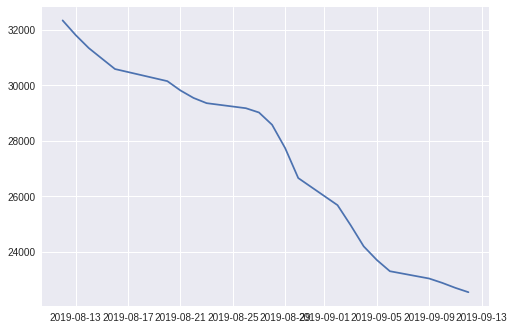

In [30]:
# ZOOM Entre el 12 de Agosto de 2019 y el 13 de Septiembre de 2019
fig, ax = plt.subplots()
ax.plot(post_paso['DATE'], post_paso['DEPOSITOS PRIVADOS'])

plt.show()

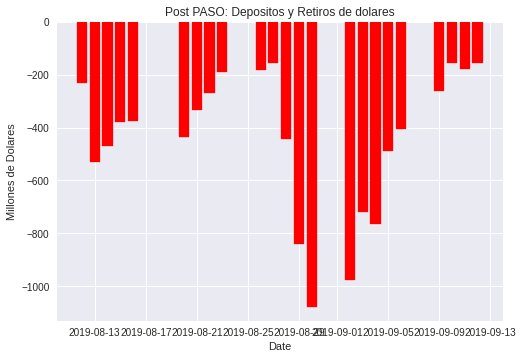

In [31]:
plt.style.use('seaborn')

fig, ax = plt.subplots()

ax.bar(post_paso['DATE'], post_paso['VARIACION'])
for bar in ax.patches:
    if bar.get_height() >= 0:
        bar.set_color('green')    
    else:
        bar.set_color('red')

ax.set_xlabel('Date')
ax.set_ylabel('Millones de Dolares')
ax.set_title('Post PASO: Depositos y Retiros de dolares')

plt.show()

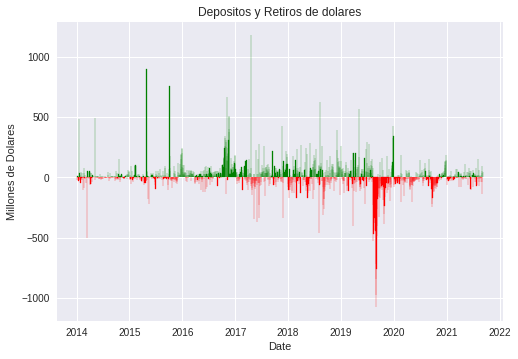

In [32]:
# GRAFICO VARIACION DIARIA
# Grafico de barras con condicional para el color ( verde >= 0, rojo < 0)

#plt.figure(figsize=(10,7))

plt.style.use('seaborn')

fig, ax = plt.subplots()

ax.bar(all_years_data['DATE'], all_years_data['VARIACION'])
for bar in ax.patches:
    if bar.get_height() >= 0:
        bar.set_color('green')    
    else:
        bar.set_color('red')

ax.set_xlabel('Date')
ax.set_ylabel('Millones de Dolares')
ax.set_title('Depositos y Retiros de dolares')

plt.show()

In [34]:
#Create a list range of dates
Dates = pd.date_range(start="2014-01-01",end="2021-03-03")
#Dates

#Convert list into df
df_dates = pd.DataFrame(Dates,columns=['DATE'])
df_dates.tail(10)

,DATE
2609,2021-02-22
2610,2021-02-23
2611,2021-02-24
2612,2021-02-25
2613,2021-02-26
2614,2021-02-27
2615,2021-02-28
2616,2021-03-01
2617,2021-03-02
2618,2021-03-03


In [35]:
#se hace un concatenate

frames = [all_years_data, df_dates]
result = pd.concat(frames)

delete_duplicate = result.groupby(['DATE'], as_index=False).sum()
delete_duplicate.tail(10)

,DATE,DEPOSITOS PRIVADOS,VARIACION,VARIACION PCT
2734,2021-08-24,16413.0,17.0,0.103684
2735,2021-08-25,16409.0,-4.0,-0.024371
2736,2021-08-26,16405.0,-4.0,-0.024377
2737,2021-08-27,16367.0,-38.0,-0.231637
2738,2021-08-30,16400.0,33.0,0.201625
2739,2021-08-31,16453.0,53.0,0.323171
2740,2021-09-01,16542.0,89.0,0.540935
2741,2021-09-02,16404.0,-138.0,-0.834240
2742,2021-09-03,16368.0,-36.0,-0.219459
2743,2021-09-06,16415.0,47.0,0.287146


In [43]:
# SE hace un similar de vlookup
# 
#calendar = all_years_data.merge(df_dates, on=['DATE'])
#calendar

In [37]:
# Fill in missing values with previous values

delete_duplicate = delete_duplicate.replace(0, np.nan)
#delete_duplicate.tail(10)

delete_duplicate.fillna(method='ffill', inplace=True)
delete_duplicate.tail(10)

,DATE,DEPOSITOS PRIVADOS,VARIACION,VARIACION PCT
2734,2021-08-24,16413.0,17.0,0.103684
2735,2021-08-25,16409.0,-4.0,-0.024371
2736,2021-08-26,16405.0,-4.0,-0.024377
2737,2021-08-27,16367.0,-38.0,-0.231637
2738,2021-08-30,16400.0,33.0,0.201625
2739,2021-08-31,16453.0,53.0,0.323171
2740,2021-09-01,16542.0,89.0,0.540935
2741,2021-09-02,16404.0,-138.0,-0.834240
2742,2021-09-03,16368.0,-36.0,-0.219459
2743,2021-09-06,16415.0,47.0,0.287146


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x979.2 with 9 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f734a345bd0>,
       dtype=object))

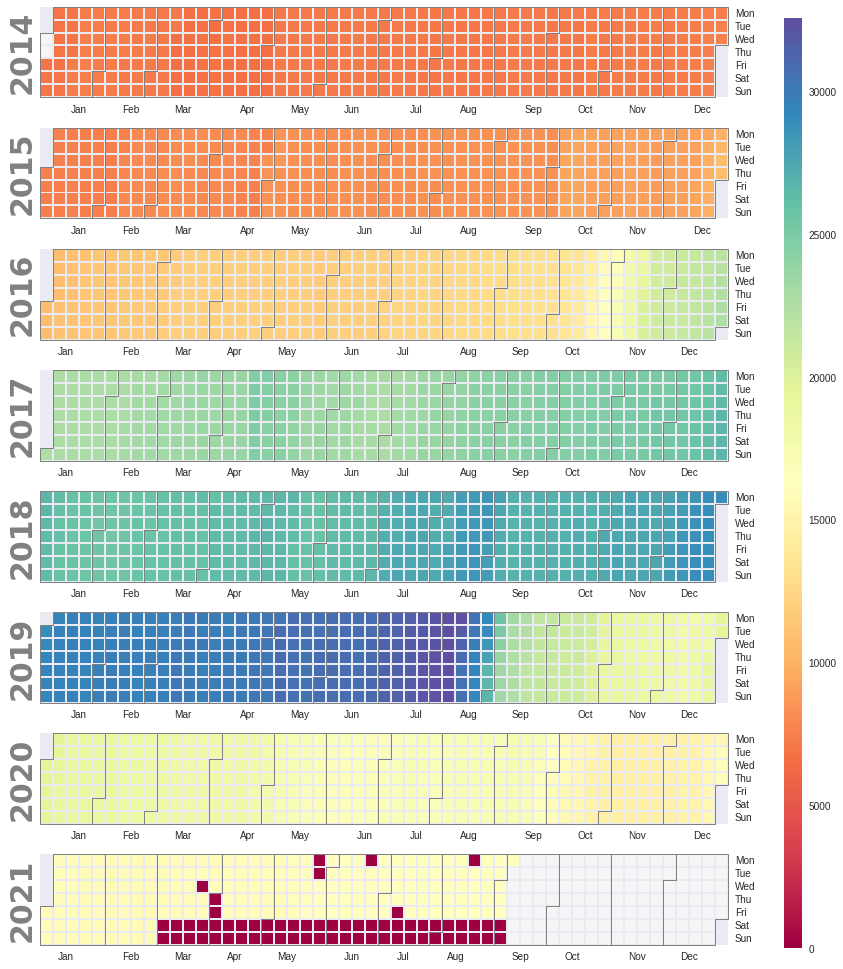

In [38]:
# Set Index
 
delete_duplicate_ind = delete_duplicate.set_index('DATE')

# elimnar los NaNs
delete_duplicate_ind = delete_duplicate_ind.dropna()
#delete_duplicate_ind.head()
#calendar_ind.tail()

# Create a Calendar

calplot.calplot(delete_duplicate_ind['DEPOSITOS PRIVADOS'],cmap='Spectral')

In [39]:
#Ingreso de dolares mayores a 600 millones diarios
all_years_data[all_years_data['VARIACION']>600]

,DATE,DEPOSITOS PRIVADOS,VARIACION,VARIACION PCT
102,2015-04-29,8465.0,893.0,11.793450
211,2015-10-05,9100.0,756.0,9.060403
235,2016-11-07,17803.0,665.0,3.880266
95,2017-04-17,24808.0,1175.0,4.971861
173,2018-08-10,27976.0,625.0,2.285108


In [40]:
#Egreso de dolares mayores a -400 millones diarios
all_years_data[all_years_data['VARIACION']<-400]

,DATE,DEPOSITOS PRIVADOS,VARIACION,VARIACION PCT
72,2014-03-12,6672.0,-503.0,-7.010453
165,2018-07-31,27139.0,-460.0,-1.666727
84,2019-03-28,29667.0,-403.0,-1.340206
174,2019-08-13,31811.0,-529.0,-1.635745
175,2019-08-14,31343.0,-468.0,-1.471189
178,2019-08-20,30153.0,-436.0,-1.425349
184,2019-08-28,28582.0,-442.0,-1.522878
185,2019-08-29,27740.0,-842.0,-2.945910
186,2019-08-30,26663.0,-1077.0,-3.882480
187,2019-09-02,25687.0,-976.0,-3.660503


In [41]:
# Que paso entre Octubre y Diciembre 2016 ?? Solo dos dias con retiro de dinero....Ingresaron mas de 7000 millones

que_pasoooo = all_years_data[(all_years_data['DATE'] > '2016-10-01') & (all_years_data['DATE'] <= '2016-12-01')]
#que_pasoooo.head(50)

print(que_pasoooo)

print('En un mes ingresaron ',que_pasoooo['VARIACION'].sum(),' millones de dolares')

          DATE  DEPOSITOS PRIVADOS  VARIACION  VARIACION PCT
211 2016-10-03             13413.0      100.0       0.751145
212 2016-10-04             13442.0       29.0       0.216208
213 2016-10-05             13542.0      100.0       0.743937
214 2016-10-06             13607.0       65.0       0.479988
215 2016-10-07             13695.0       88.0       0.646726
216 2016-10-11             13801.0      106.0       0.774005
217 2016-10-12             13883.0       82.0       0.594160
218 2016-10-13             14032.0      149.0       1.073255
219 2016-10-14             14203.0      171.0       1.218643
220 2016-10-17             14361.0      158.0       1.112441
221 2016-10-18             14521.0      160.0       1.114129
222 2016-10-19             14761.0      240.0       1.652779
223 2016-10-20             15090.0      329.0       2.228846
224 2016-10-21             15431.0      341.0       2.259775
225 2016-10-24             15638.0      207.0       1.341456
226 2016-10-25          

In [42]:
# Que paso estos tres dias de Abril de 2017 ?? ingresaron casi 1300 millones ...
que_pasoooo_aca = all_years_data[(all_years_data['DATE'] > '2017-04-11') & (all_years_data['DATE'] <= '2017-04-18')]

print(que_pasoooo_aca)

print('En tres dias ingresaron ',que_pasoooo_aca['VARIACION'].sum(),' millones de dolares')

         DATE  DEPOSITOS PRIVADOS  VARIACION  VARIACION PCT
94 2017-04-12             23633.0       33.0       0.139831
95 2017-04-17             24808.0     1175.0       4.971861
96 2017-04-18             24882.0       74.0       0.298291
En tres dias ingresaron  1282.0  millones de dolares
